In [5]:
!pip install plotly --q

In [7]:
!pip install fredapi --q

In [23]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

fred_api_key = os.getenv('API_KEY')

## 1. Create The Fred Object

In [11]:
fred = Fred(fred_api_key)

## 2. Search for economic data

In [15]:
sp_search = fred.search('S&P',order_by='popularity')

In [18]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-09-11,2024-09-11,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-09-10,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-09-11 08:42:12-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-09-11,2024-09-11,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-08-27 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-09-11,2024-09-11,S&P 500,2014-09-11,2024-09-10,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-09-10 19:40:49-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-09-11,2024-09-11,Real Median Household Income in the United States,1984-01-01,2023-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2024-09-11 09:45:01-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-09-11,2024-09-11,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-09-10,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-09-11 08:42:15-05:00,82,This data represents the effective yield of th...


## 3. Pull Raw Data

In [19]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

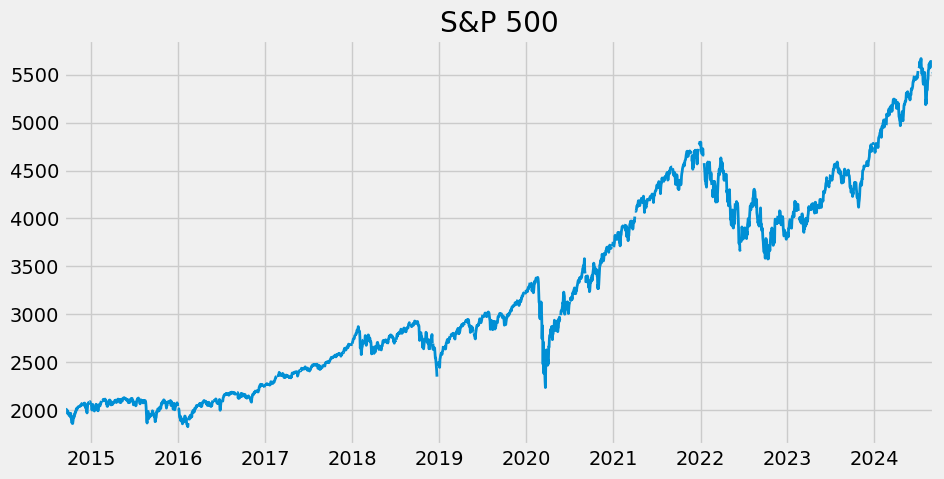

In [21]:
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

## 4. Pull and Join Multiple Data Series 